# <div align = "center"><b>CE1015 Project - FS3 Group 3</b></div>

## Presented by
Brandon
<br>Kenny
<br>Sabrina
<br>Snehaa

Dataset: [Seattle Airbnb Open Data | Kaggle](https://www.kaggle.com/airbnb/seattle)

## **Problem Statements**

### Real life Problem
> How might we help new hosts craft listings that will effectively attract their target audience?
### Data Science Problem
> 1. What is the price of a listing given its characteristics (Numeric Problem)
2. What are the common types of listings given their characteristics (Structural Problem)

#### Assumptions
> 1. We will not be using a rolling-average price as we only want to give an estimate for the users to get started on their listing. This could be changed at a later date.
2. Thus, we assume that the price is consistent throughout the year although there are seasonal prices on Airbnb.
3. Data in the dataset is correct. Null data will be interpretted accordingly.

## **Essential Libraries to Install on Anaconda / Google Colab / Jupyter Notebook**
_This notebook was built on Google Colab._
>1. geopandas - To do 
2. adjustText - To do
3. rfpimp - To do variable score weighing
4. tensorflow - To do deep learning
5. nltk - To provide natural language processing toolkit
6. ipywidgets - To build the dashboard

<br><b>Anaconda:</b>
<br> Geopandas:
```
conda install -c condaforge geopandas 
```
adjustText:
```
pip install adjustText
```
rfpimp:
```
conda install -c conda-forge rfpimp
```
nltk:
```
conda install -c anaconda nltk
```
ipywidgets:
```
conda install -c anaconda ipywidgets
```
Tensorflow CPU only:
```
conda create -n tf tensorflow
conda activate tf
```
Tensorflow CUDA 10.0 GPU:
```
conda create -n tf-gpu tensorflow-gpu
conda activate tf-gpu
```

_To clarify, we have not tried installing either versions of tensorflow on our anaconda and these instructions are from the [documentation](https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/) found in the link._

<br><b>Jupyter Notebook:</b>
> Same as anaconda if you are using anaconda to run jupyter notebook. Else, pip can be used.

<br><b>Google Colab:</b>
<br>Pip can be used to install, just include a ! infront.

<br>Tensorflow:
```
!pip install -q git+https://github.com/tensorflow/docs
```
Geopandas and adjustText:
```
!pip install geopandas
!pip install adjustText
```
Others:
<br>Common libraries are already installed in Google Colab.

## **Essential Files**
> 1. listings.csv
2. reviews.csv
3. neighbourhood.geojson

## **Import Essential Libraries and Datasets**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Relevant file locations / url
listings_loc = "https://raw.githubusercontent.com/brandonywl/cz1015-miniproject/master/listings.csv"
calendar_loc = "https://raw.githubusercontent.com/kennyvoo/CS1015_Mini_Project/master/calendar.csv"
reviews_loc = "https://raw.githubusercontent.com/brandonywl/cz1015-miniproject/master/reviews.csv"
geojson_loc = 'neighborhoods.geojson'

In [0]:
listings = pd.read_csv(listings_loc)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [0]:
calendar = pd.read_csv(calendar_loc)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [0]:
reviews_data = pd.read_csv(reviews_loc)
reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## <div align = 'center'><b> Data Cleaning / Preparing Dataset </b></div>

### **Drop the columns that is not needed**

In [0]:
#finding the variables with high number of 'NaN' input values
listings.isna().sum().sort_values(ascending = False).head(15)

license                   3818
square_feet               3721
monthly_price             2301
security_deposit          1952
weekly_price              1809
notes                     1606
neighborhood_overview     1032
cleaning_fee              1030
transit                    934
host_about                 859
host_acceptance_rate       773
review_scores_accuracy     658
review_scores_checkin      658
review_scores_value        656
review_scores_location     655
dtype: int64

Variables was went through individually and we assessed the significance of each variable for our usecase. 
<br>We eventually decided to drop the following data.

In [0]:
listings = pd.read_csv(listings_loc)
variables = [var for var in listings]

#exclude host characteristics, administratives like URL and ID which will not gain us more insight to the data, and variables which information are already represented by other variables.
variables_to_drop=[]
#dropping host characteristics
variables_to_drop += ['host_url', 'host_name', 'host_id', 'host_since', 'host_location', 'host_about', 'host_response_time',
                      "host_acceptance_rate", "host_is_superhost","host_thumbnail_url", "host_picture_url", "host_verifications",
                      "host_has_profile_pic", "host_identity_verified",'host_neighbourhood', 'host_response_rate',
                      'host_listings_count', 'host_total_listings_count']

#dropping administrative information
variables_to_drop += ['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
                      'name','summary', 'space', 'description', 'experiences_offered', 'notes', 'transit',\
                     "first_review", "last_review","jurisdiction_names", "requires_license", "license", "calendar_last_scraped","square_feet",
                      "country", "country", "country_code", "smart_location", "state", "city", "is_location_exact", "bed_type",\
                     "extra_people", "minimum_nights", "maximum_nights", "calendar_updated", 'has_availability']
#dropping variables whose information is contained in other variables
variables_to_drop += ["availability_60", "availability_90", #represented by 'availability_30', 'availability_365'
                     "neighbourhood_cleansed", "neighbourhood", "market",'street', 'neighborhood_overview' #represented by neighbourhood_group_cleansed'
                     ]


for var in variables_to_drop:
    try:
      variables.remove(var)
    except:
      pass

listings = pd.DataFrame(listings[variables])

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   neighbourhood_group_cleansed      3818 non-null   object 
 2   zipcode                           3811 non-null   object 
 3   latitude                          3818 non-null   float64
 4   longitude                         3818 non-null   float64
 5   property_type                     3817 non-null   object 
 6   room_type                         3818 non-null   object 
 7   accommodates                      3818 non-null   int64  
 8   bathrooms                         3802 non-null   float64
 9   bedrooms                          3812 non-null   float64
 10  beds                              3817 non-null   float64
 11  amenities                         3818 non-null   object 
 12  price 

Next, we identify the empty data entries that we have to fill up.

In [0]:
listings.isna().sum().sort_values(ascending = False).head(15)

monthly_price                  2301
security_deposit               1952
weekly_price                   1809
cleaning_fee                   1030
review_scores_accuracy          658
review_scores_checkin           658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
reviews_per_month               627
bathrooms                        16
zipcode                           7
bedrooms                          6
dtype: int64

### **Numerical Data**

In [0]:
cleaned_data = listings.copy()

# Convert the price, weekly price and monthly price from string to float
# Remove $ and ,
prices = ["price", "security_deposit", "cleaning_fee"]
for price in prices:
  cleaned_data[price] = cleaned_data[price].str.replace("$","")
  cleaned_data[price] = cleaned_data[price].str.replace(",","")
  cleaned_data[price] = cleaned_data[price].astype("float64")

# Assuming no entry means no reviews
cleaned_data["reviews_per_month"].fillna(value = 0, inplace = True)

# Isolate all the review_scores and fill in empty reviews with the median, assuming that no review means people deem it to be normal
review_scores = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', \
                 'review_scores_checkin', 'review_scores_communication', 'review_scores_communication', \
                 'review_scores_location', 'review_scores_value']

for review in review_scores:
  cleaned_data[review].fillna(value = cleaned_data[review].median(), inplace = True)

# Assume that empty entries == no special price. Hence weekly price = price * 7 and monthly price = price * 31
empty_prices = ["weekly_price", "monthly_price"]
days = [7,31]
count = 0
for price in empty_prices:
  cleaned_data[price].fillna(value = cleaned_data['price'] * days[count], inplace = True)
  count += 1


# Assume that empty entries == No security deposit and no cleaning fees
empty_prices = ['security_deposit', 'cleaning_fee']
for price in empty_prices:
  cleaned_data[price].fillna(value = 0, inplace = True)

# As some accomodations have 4.5 toilets, we are going to assume that an empty entry == there are no toilets in the apartment. Same goes for
# beds and bedrooms
# This can be the scenario where they only rent the apartment, hence no access to the toilet
# Or they rent a boat and does not count as a bedroom / bed
rooms = ['bathrooms', 'bedrooms', 'beds']
for room in rooms:
  cleaned_data[room].fillna(value=0, inplace = True)


cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   neighbourhood_group_cleansed      3818 non-null   object 
 2   zipcode                           3811 non-null   object 
 3   latitude                          3818 non-null   float64
 4   longitude                         3818 non-null   float64
 5   property_type                     3817 non-null   object 
 6   room_type                         3818 non-null   object 
 7   accommodates                      3818 non-null   int64  
 8   bathrooms                         3818 non-null   float64
 9   bedrooms                          3818 non-null   float64
 10  beds                              3818 non-null   float64
 11  amenities                         3818 non-null   object 
 12  price 

### **Categorical Data**

We will be reducing down the number of categories that have low counts and is similar to another property type.

In [0]:
cleaned_data.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [0]:
# Replacing categories that are types of houses or apartments
cleaned_data.property_type.replace({
    'Townhouse': 'House',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
cleaned_data.loc[~cleaned_data.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'
cleaned_data.property_type.value_counts()

House        1866
Apartment    1748
Other         204
Name: property_type, dtype: int64

In [0]:
# Isolate all the categorical data as they are the only ones with type object left
categorical_data = ['instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', \
                    'require_guest_phone_verification', 'neighbourhood_group_cleansed', \
                    'property_type', 'room_type']
for data in categorical_data:
  # Convert data type to category
  cleaned_data[data] = cleaned_data[data].astype('category')

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   id                                3818 non-null   int64   
 1   neighbourhood_group_cleansed      3818 non-null   category
 2   zipcode                           3811 non-null   object  
 3   latitude                          3818 non-null   float64 
 4   longitude                         3818 non-null   float64 
 5   property_type                     3818 non-null   category
 6   room_type                         3818 non-null   category
 7   accommodates                      3818 non-null   int64   
 8   bathrooms                         3818 non-null   float64 
 9   bedrooms                          3818 non-null   float64 
 10  beds                              3818 non-null   float64 
 11  amenities                         3818 non-null   object

#### **Amenities**

Next, the amenities is provided as a list. We will open up the list and explore the amenities we find useful in determining price. We also simplified the categories for some amenities to account for similar amenities, thus reducing the count.

In [0]:
# change the object to str
amenities=cleaned_data["amenities"].astype("str")
#join the data by "," and split the long string into a wordlist by ","
amenities=','.join(amenities)
word_list=amenities.split(sep=",")

new_wordlist=[]
#clean the data
for word in word_list:
    word=word.replace("}","")
    word=word.replace("{","")
    word=word.replace("\"","")
    new_wordlist.append(word)
    
#convert to a series and count the unique amenities
word_series=pd.Series(new_wordlist)
len(word_series.unique())


42

In [0]:
word_series.value_counts()

Wireless Internet             3667
Heating                       3627
Kitchen                       3423
Smoke Detector                3281
Essentials                    3237
Dryer                         2997
Washer                        2992
Internet                      2811
Shampoo                       2670
TV                            2574
Carbon Monoxide Detector      2485
Fire Extinguisher             2196
Free Parking on Premises      2167
Family/Kid Friendly           1963
First Aid Kit                 1680
Cable TV                      1446
Indoor Fireplace               886
Pets live on this property     883
Hangers                        846
Elevator in Building           785
Hair Dryer                     774
Laptop Friendly Workspace      745
Iron                           742
Safety Card                    727
Air Conditioning               677
24-Hour Check-in               616
Buzzer/Wireless Intercom       538
Dog(s)                         509
Pets Allowed        

#### **Choosing the amenities that might be useful to determine the price**
We will exclude amenities that over 3000 listings and less than 400 listings possess as they do not impact the price significantly. 

In [0]:
#Grouping amenities that mean the same facility under one variable
cleaned_data.loc[cleaned_data['amenities'].str.contains('Dryer|Washer'), 'Laundry'] = 1
cleaned_data.loc[cleaned_data['amenities'].str.contains('TV|"Cable TV'), 'TV'] = 1
cleaned_data.loc[cleaned_data['amenities'].str.contains('Free Parking on Premises'), 'Parking'] = 1
cleaned_data.loc[cleaned_data['amenities'].str.contains('Family/Kid Friendly'), 'Family_friendly'] = 1
cleaned_data.loc[cleaned_data['amenities'].str.contains('Pets live on this property|Pets Allowed|Cat(s)|Dog(s)'), 'Pets_friendly'] = 1
cleaned_data.loc[cleaned_data['amenities'].str.contains('Elevator in Building'), 'Elevator'] = 1
cleaned_data.loc[cleaned_data['amenities'].str.contains('Safety Card'), 'Security'] = 1
cleaned_data.loc[cleaned_data['amenities'].str.contains('Air Conditioning'), 'Air_conditioning'] = 1
cleaned_data.loc[cleaned_data['amenities'].str.contains('24-Hour Check-in'), '24-Hour_Check-in'] = 1
cleaned_data.loc[cleaned_data['amenities'].str.contains('Gym'), 'Gym'] = 1


/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [0]:
# Replacing nulls with zeros for new columns
amenities_cols = ["Laundry","TV","Parking","Family_friendly","Pets_friendly","Elevator","Security","Air_conditioning","24-Hour_Check-in","Gym"]
cleaned_data[amenities_cols] = cleaned_data[amenities_cols].fillna(0)

# Dropping amenities
cleaned_data.drop('amenities', axis=1, inplace=True)


In [0]:
cleaned_data[amenities_cols]

,Laundry,TV,Parking,Family_friendly,Pets_friendly,Elevator,Security,Air_conditioning,24-Hour_Check-in,Gym
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3813,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3814,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3815,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3816,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## <div align='center'><b> Exploratory Analysis </b></div>



### **Correlation heatmap to identify patterns**

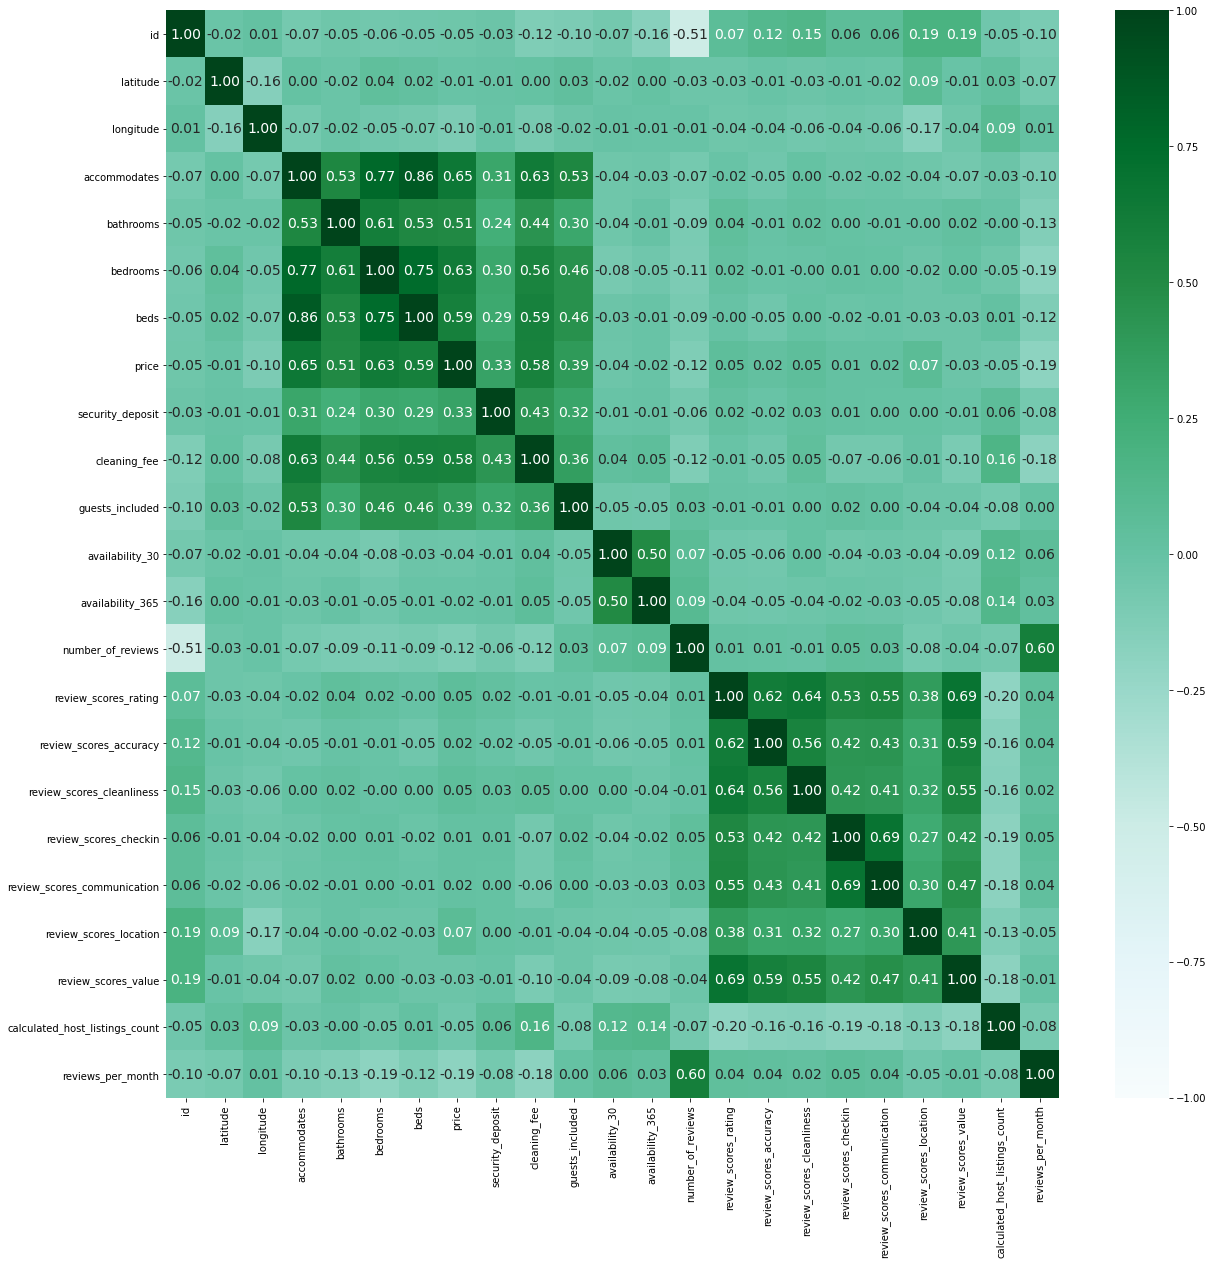

In [0]:
#heatmap to show the corealation between variables, to see which variables have the strongest relationship
f, axes = plt.subplots(1,1, figsize = (20,20))
sb.heatmap(cleaned_data.drop(amenities_cols,axis=1).corr(),annot = True, fmt = ".2f", annot_kws = {"size": 14},
           vmin = -1, vmax = 1, cmap = 'BuGn')

From the heatmap above, we can notice that some of the features has strong correlation with the price. Let's show only the the features with correlation > 0.3 with price

[Text(0, 0.5, 'price'),
 Text(0, 1.5, 'accommodates'),
 Text(0, 2.5, 'bedrooms'),
 Text(0, 3.5, 'beds'),
 Text(0, 4.5, 'cleaning_fee'),
 Text(0, 5.5, 'bathrooms'),
 Text(0, 6.5, 'guests_included'),
 Text(0, 7.5, 'security_deposit')]

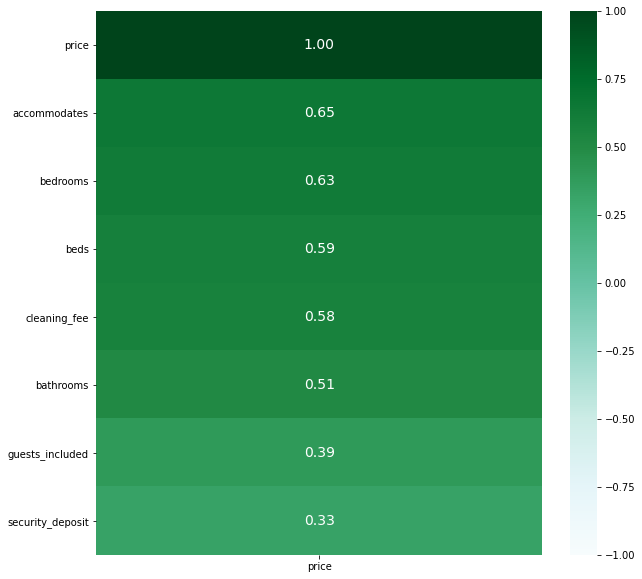

In [0]:
#heatmap to show the corealation between variables, to see which variables have the strongest relationship
f, axes = plt.subplots(1,1, figsize = (10,10))

cor_target = abs(cleaned_data.drop(amenities_cols,axis=1).corr()["price"])
features = cor_target[cor_target>0.3].sort_values(ascending=False)


hm=sb.heatmap(features.to_frame(),annot = True, fmt = ".2f", annot_kws = {"size": 14},
           vmin = -1, vmax = 1, cmap = 'BuGn')
#Correlation with output variable
hm.set_yticklabels(hm.get_yticklabels(),rotation=0)



**Conclusion:** 

From the heatmap above, we know that accomodates, bedrooms, beds, cleaning fee and bathrooms that has correlation of more than 0.5 are important in estimating the price of a listing.
<br>They have moderate positive relationship with price.
<br>We decided to use guests_included as it does improve the r^2 of the models

 ### How does number of accomodates affect the price?

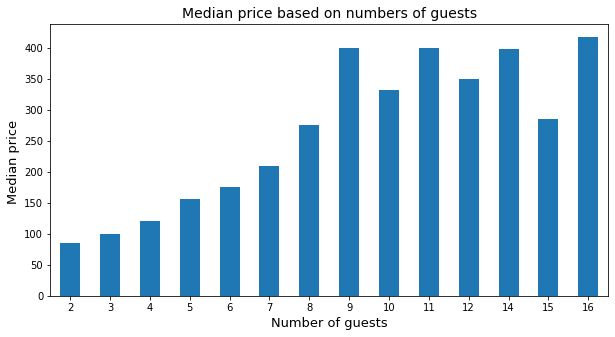

In [0]:
plt.figure(figsize=(10,5))
cleaned_data.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price based on numbers of guests', fontsize=14)
plt.xlabel('Number of guests', fontsize=13)
plt.ylabel('Median price ', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

**Conclusion:** 
From the graph above, we can noticed that the price of the listings increases as the number of guests increases. There is a strong linear relationship between median price and number of guests


###**How does number of bedrooms,beds, bathroom, guests_included affect the price?**




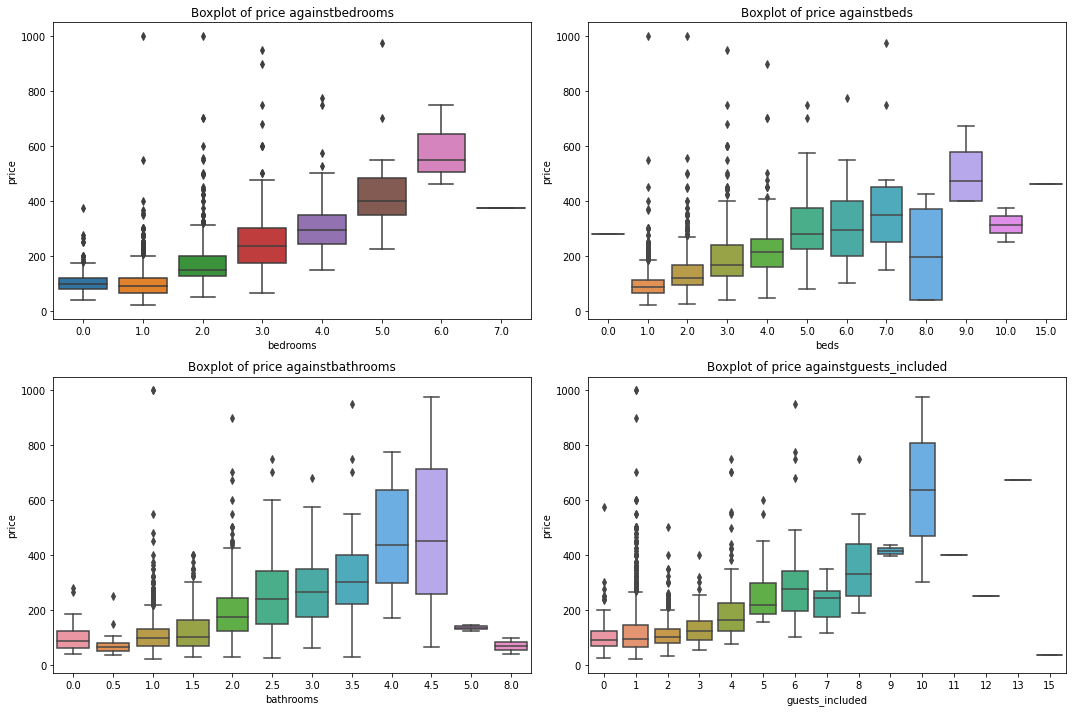

In [0]:
f,axes = plt.subplots(2,2,figsize=(15,10))
features_to_check= ["bedrooms","beds","bathrooms","guests_included"]
row=0
col=0
from numpy import median
for item in features_to_check:
  sb.boxplot(x=cleaned_data[item],y=cleaned_data["price"],ax=axes[row][col]).set_title("Boxplot of price against" + item)
  #sb.barplot(x=cleaned_data[item],y=cleaned_data["price"],ax=axes[row][col],estimator=median,palette="Blues_d").set_title("Median price based on number of " + item)
  col+=1
  if(col==2):
    col=0
    row=1
f.tight_layout()


**Conclusion:**
In general, the price increases as the number of bedrooms, beds ,bathrooms and number of guest included. The listing with 0 bed might be a boat, that's the reason the price is higher when compared to listings with 1 to 4 beds

### **How does the cleaning fee and security deposit affect price?**





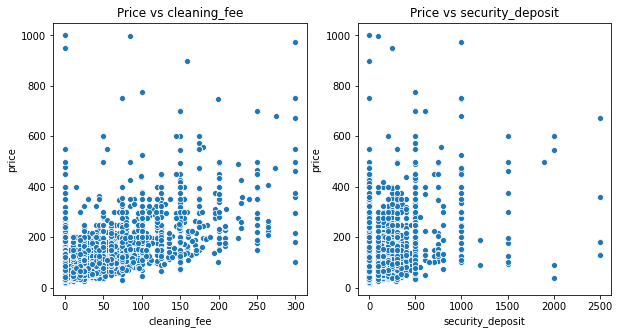

In [0]:
f,axes = plt.subplots(1,2,figsize=(10,5))
features_to_check= ["cleaning_fee","security_deposit"]
col=0
from numpy import median
for item in features_to_check:
  ## take value lesser than 3000 to eliminate the outlier on security_deposit
  sb.scatterplot(x=cleaned_data[item][cleaned_data[item]<3000 ],y=cleaned_data["price"],ax=axes[col],palette="Blues_d").set_title("Price vs " + item)
  col+=1

**Conclusion:** There is a moderate positive relation between price and cleaning fee. On the other hand, the relationship between the price and security_deposit is weak.

### **Does property type and room type affect the price of listings?**

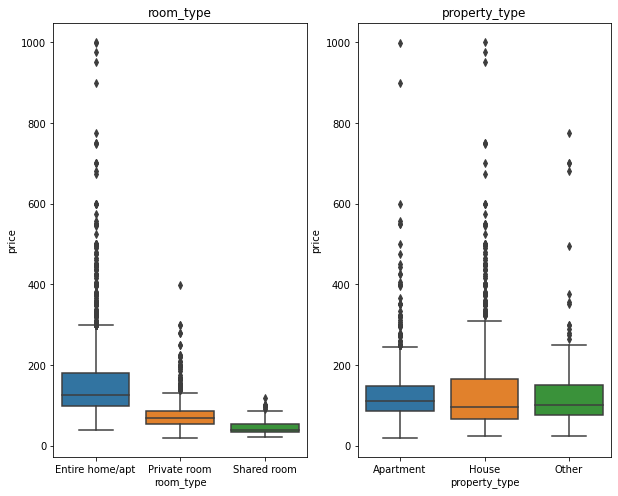

In [0]:
f,axes = plt.subplots(1,2,figsize=(10,8))
features_to_check= ["room_type","property_type"]
col=0
for item in features_to_check:
  sb.boxplot(x=cleaned_data[item],y=cleaned_data["price"],ax=axes[col]).set_title( item)
  col+=1

**Conclusion** The boxplots shows that the room type does affect the price significantly. Entire home/apt room type has overally higher price than other room types.

<br>However, the property type does not affect the price as much as room type. The difference between the property type is not large.

### **Does neighbourhood affect the price of listings?**



In [0]:
cleaned_data.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

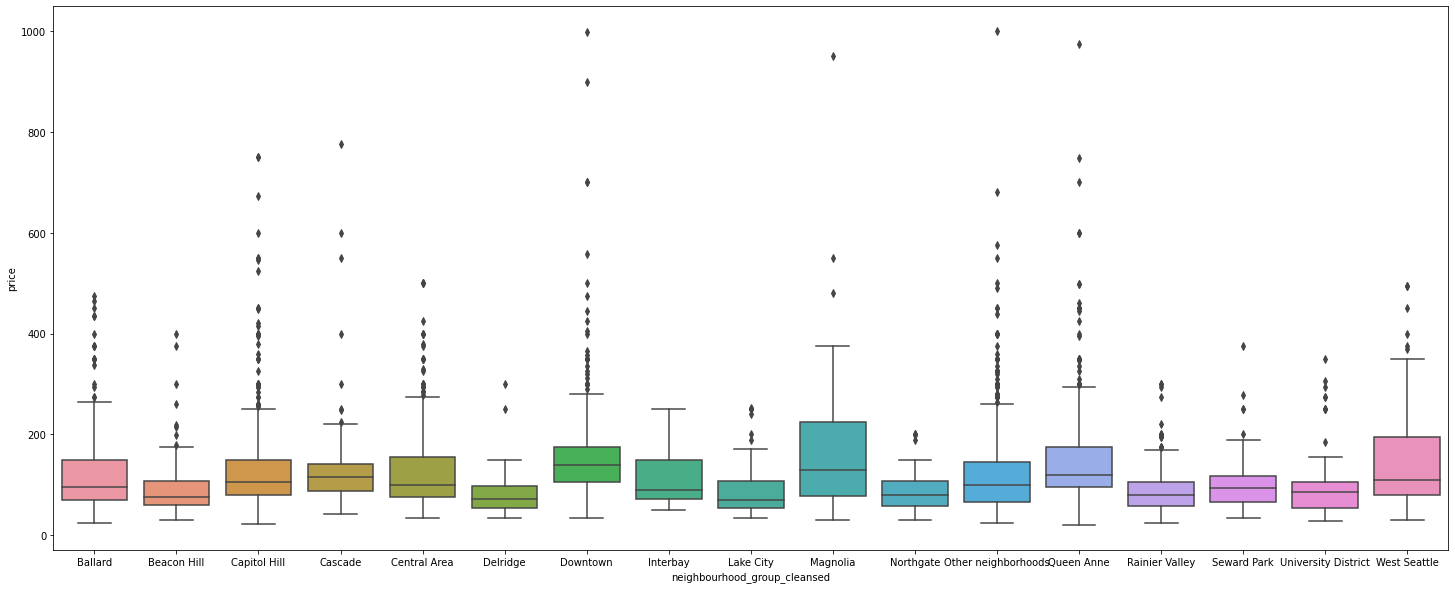

In [0]:
plt.figure(figsize=(25,10))
# visualise it in boxplot
sb.boxplot(x=cleaned_data.neighbourhood_group_cleansed,y=cleaned_data.price)

In [0]:
#get the number of lisitngs in the neighbourhood_group_cleansed
cleaned_data.groupby('neighbourhood_group_cleansed').size()
neigh_group = pd.DataFrame(cleaned_data.groupby('neighbourhood_group_cleansed').size())
neigh_group.rename(columns={0: 'number_of_listings'}, inplace=True)
#get the median price of the neighbourhood_group_cleansed
neigh_group['median_price'] = cleaned_data.groupby('neighbourhood_group_cleansed').price.median().values

We'll compare the median price between neighbourhood_group

In [0]:
neigh_group['median_price'].sort_values(ascending = False)

neighbourhood_group_cleansed
Downtown               139.0
Magnolia               129.0
Queen Anne             119.0
Cascade                115.0
West Seattle           109.0
Capitol Hill           105.0
Central Area           100.0
Other neighborhoods     99.0
Ballard                 95.0
Seward Park             93.0
Interbay                90.0
University District     85.0
Rainier Valley          80.0
Northgate               79.5
Beacon Hill             75.0
Delridge                72.0
Lake City               70.0
Name: median_price, dtype: float64

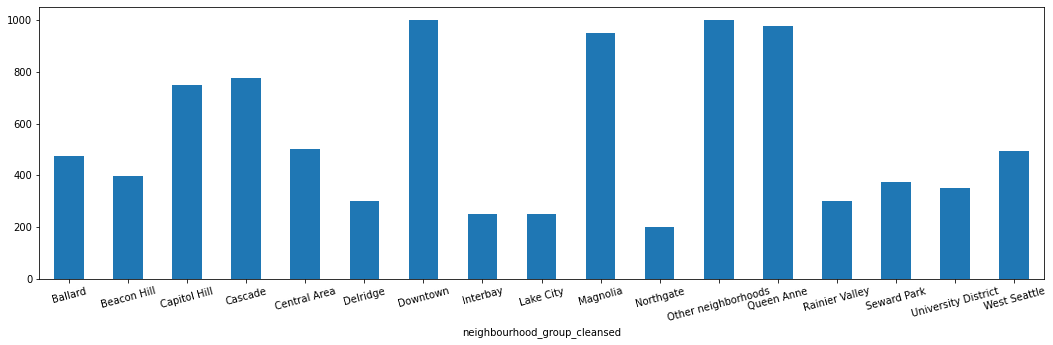

In [0]:
plt.figure(figsize=(18,5))
cleaned_data.groupby('neighbourhood_group_cleansed').price.max().plot(kind="bar")
plt.xticks(rotation=15)
plt.show()

In [0]:
neigh_group.index

CategoricalIndex(['Ballard', 'Beacon Hill', 'Capitol Hill', 'Cascade',
                  'Central Area', 'Delridge', 'Downtown', 'Interbay',
                  'Lake City', 'Magnolia', 'Northgate', 'Other neighborhoods',
                  'Queen Anne', 'Rainier Valley', 'Seward Park',
                  'University District', 'West Seattle'],
                 categories=['Ballard', 'Beacon Hill', 'Capitol Hill', 'Cascade', 'Central Area', 'Delridge', 'Downtown', 'Interbay', ...], ordered=False, name='neighbourhood_group_cleansed', dtype='category')

In [0]:
# geojson_loc variable is declared and instantiated at the top. If it is not, please run that cell.
!pip install geopandas
!pip install adjustText
import geopandas as gpd
import adjustText as aT
map_df = gpd.read_file(geojson_loc)
len(map_df.nhood.unique())

85

In [0]:
# only include part of seattle that is in the neighborhood groups
map_diff = map_df[map_df['nhood'].isin(neigh_group.index)]
len(map_diff.nhood.unique())
seatle_map_df = map_diff.set_index('nhood').join(neigh_group)
c=seatle_map_df
c['coords'] = c['geometry'].apply(lambda x: x.representative_point().coords[:])
c['coords'] = [coords[0] for coords in c['coords']]

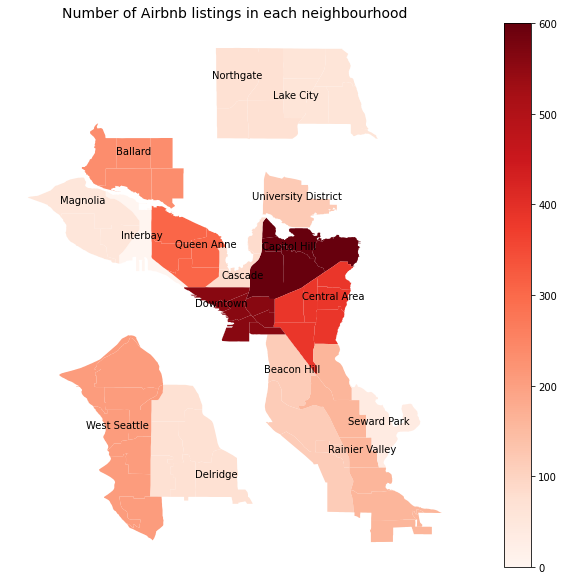

In [0]:

# Plotting the number of listings in each neighbourhood
fig1, ax1 = plt.subplots(1,figsize=(15, 10))
seatle_map_df.plot(column='number_of_listings', cmap='Reds', ax=ax1,)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=600))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)

for idx, row in c.drop_duplicates("number_of_listings").iterrows():
    if(idx!="Capitol Hill" and idx!="Cascade"):
      offset=(0,0)
    else :
      offset=(20,-20)
    plt.annotate(s=idx, xy=row['coords'],
                 horizontalalignment='center',xytext=offset, textcoords='offset points' )
                 

In [0]:
# Plotting the median price of listings in each neighbourhood
fig2, ax2 = plt.subplots(1, figsize=(15, 10))
seatle_map_df.plot(markersize=14,column='median_price', cmap='Reds', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=min(seatle_map_df.median_price), vmax=max(seatle_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)



for idx, row in c.drop_duplicates("number_of_listings").iterrows():
    if(idx!="Capitol Hill" and idx!="Cascade"):
      offset=(0,0)
    else :
      offset=(20,-20)
    plt.annotate(s=idx, xy=row['coords'],
                 horizontalalignment='center',xytext=offset, textcoords='offset points' )


plt.show()

**Conclusion:** From the map, we know that Capitol Hill has the most Airbnb properties, followed by Downtown and Central Area. These are probably the central area of Seattle. Thus, there's a high demand for Airbnb.

However, the pattern with price is different. Downtown is the most expensive area, followed by Magnolia and Queen Anne. The price of listing in central area are higher than other area. However, places like Magnolia and West Seattle are expensive even though there are far from Central Area might be because the location is very beautiful and quiet.

The neighbourhood does affect the price of listings. The central area and some unique part in Seattle are more expensive than other area.

### **How amenitites affect price**

In [0]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    cleaned_data.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    cleaned_data.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price')
    ax2.set_xlabel('')
    
    plt.show()

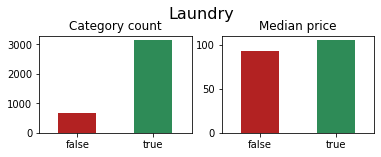

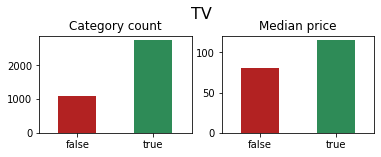

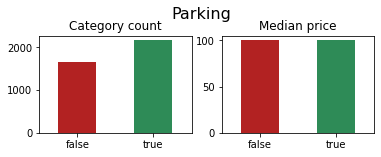

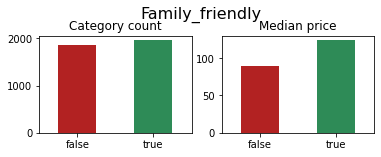

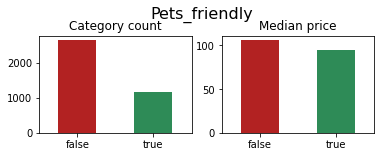

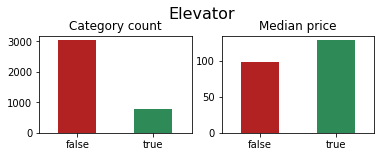

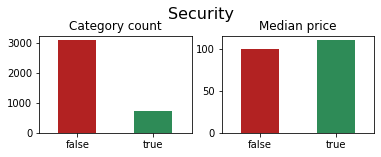

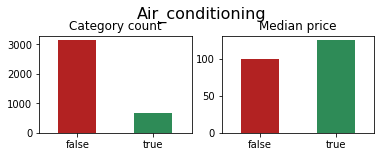

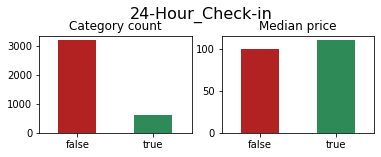

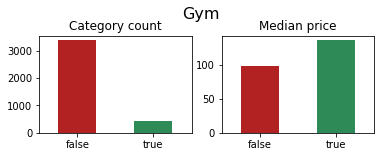

In [0]:
for col in cleaned_data[amenities_cols]:
    binary_count_and_price_plot(col, figsize=(6,2))

**Conclusion** Typically, the inclusion of an amenity raises the price of an listing. Amenities such as TV, family friendly, elevator, Air conditioning and gym boost the price of a listing drastically.<br>Amenities such as Laundry, Parking, Security, 24-Hour_Check-in does not have huge impacts on the price. <br>However, pets friendly lower the price of the listings.


## <div align = 'center'><b> Cleaning the dataset to suit the problem statement </b></div>

### **Dropping variables not used after exploratory analysis**
#### Numerical Variables
> 1. Weekly Price will not be used in the regression or clustering
2. Monthly Price will not be used in the regresison or clustering
3. Zipcode will not be used in the regression or clustering
4. Latitude and Longitude was only used for visualization and is not used in regression of clustering
5. Anything to do with reviews inside has low correlation with price and will not be used in the regression or clustering
6. Availability_30 and Availability_365 will not be used in the regression or clustering
7. Calculated_host_listings_count will not be used in regresison or clustering

#### Categorical Variables
> 1. Instant_bookable will not be used in regression or clustering
2. Cancellation_policy will not be used in regression or clustering
3. Require_guest_profile_picture and require_guest_phone_verification will not be used in regression or clustering


In [0]:
# All the numeric data to be dropped except for review_scores which will be handled below
cols_to_drop = [ 'zipcode', 'latitude', 'longitude', 'availability_30', 'availability_365', \
                'calculated_host_listings_count', 'reviews_per_month', 'number_of_reviews']

# Adds review_scores_ to infront of each of the different categories
review_scores_list = ['rating', 'accuracy', 'cleanliness', 'checkin', 'communication', 'location', 'value']
for i, s in enumerate(review_scores_list):
  review_scores_list[i] = "review_scores_" + s

cols_to_drop += review_scores_list

# Adds all the categorical data to drop
cols_to_drop += ['instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']

try:
  cleaned_data = cleaned_data.drop(columns = cols_to_drop)
except:
  print("Drop failed. Check if already dropped.")

cleaned_data

,id,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,Laundry,TV,Parking,Family_friendly,Pets_friendly,Elevator,Security,Air_conditioning,24-Hour_Check-in,Gym
0,241032,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,85.0,595,2635,0.0,0.0,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,953595,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,150.0,"$1,000.00","$3,000.00",100.0,40.0,1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3308979,Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,975.0,6825,30225,1000.0,300.0,10,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,7421966,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,100.0,$650.00,"$2,300.00",0.0,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,278830,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,450.0,3150,13950,700.0,125.0,6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,Other neighborhoods,House,Entire home/apt,6,2.0,3.0,3.0,359.0,2513,11129,0.0,230.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3814,8902327,Capitol Hill,Apartment,Entire home/apt,4,1.0,1.0,2.0,79.0,553,2449,500.0,50.0,3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3815,10267360,Rainier Valley,House,Entire home/apt,2,1.0,1.0,1.0,93.0,$450.00,2883,250.0,35.0,2,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3816,9604740,Capitol Hill,Other,Entire home/apt,2,1.0,0.0,1.0,99.0,693,3069,300.0,45.0,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<h1 align='center'> Data preparation for Linear regression  </h1>


In [0]:
cleaned_data.columns

Index(['id', 'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'Laundry', 'TV', 'Parking', 'Family_friendly',
       'Pets_friendly', 'Elevator', 'Security', 'Air_conditioning',
       '24-Hour_Check-in', 'Gym'],
      dtype='object')

After Exploratory Analysis, we have decided to include accomodates, bedrooms, beds, accomodates, cleaning_fee, guests_included, neighbourhood_group_cleansed, TV, Family_friendly, Pets_friendly, Elevator, Air_conditioning and Gym. These features has moderate to high correlation with the price and has impact to the price of a listing

In [0]:
regression_variables = ['price',"guests_included", 'neighbourhood_group_cleansed', 'room_type', 'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds']
amenities_cols = ["TV","Family_friendly","Pets_friendly","Elevator","Air_conditioning","Gym"]

regression_data = cleaned_data[regression_variables+amenities_cols]

regression_data

,price,guests_included,neighbourhood_group_cleansed,room_type,cleaning_fee,accommodates,bathrooms,bedrooms,beds,TV,Family_friendly,Pets_friendly,Elevator,Air_conditioning,Gym
0,85.0,2,Queen Anne,Entire home/apt,0.0,4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,150.0,1,Queen Anne,Entire home/apt,40.0,4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,975.0,10,Queen Anne,Entire home/apt,300.0,11,4.5,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0
3,100.0,1,Queen Anne,Entire home/apt,0.0,3,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
4,450.0,6,Queen Anne,Entire home/apt,125.0,6,2.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,1,Other neighborhoods,Entire home/apt,230.0,6,2.0,3.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0
3814,79.0,3,Capitol Hill,Entire home/apt,50.0,4,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
3815,93.0,2,Rainier Valley,Entire home/apt,35.0,2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3816,99.0,1,Capitol Hill,Entire home/apt,45.0,2,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [0]:
#transform neighbourhood_group_cleansed, room_type and property_type from categorical variables to binary variables for easier comparison with price.
transformed_df = pd.get_dummies(regression_data)
transformed_df

,price,guests_included,cleaning_fee,accommodates,bathrooms,bedrooms,beds,TV,Family_friendly,Pets_friendly,Elevator,Air_conditioning,Gym,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,85.0,2,0.0,4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,150.0,1,40.0,4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,975.0,10,300.0,11,4.5,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,100.0,1,0.0,3,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,450.0,6,125.0,6,2.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,1,230.0,6,2.0,3.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3814,79.0,3,50.0,4,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3815,93.0,2,35.0,2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3816,99.0,1,45.0,2,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Transformation of Data





In [0]:
numerical_columns = ['accommodates', 'bathrooms', "bedrooms","beds","guests_included",'cleaning_fee', 'price']

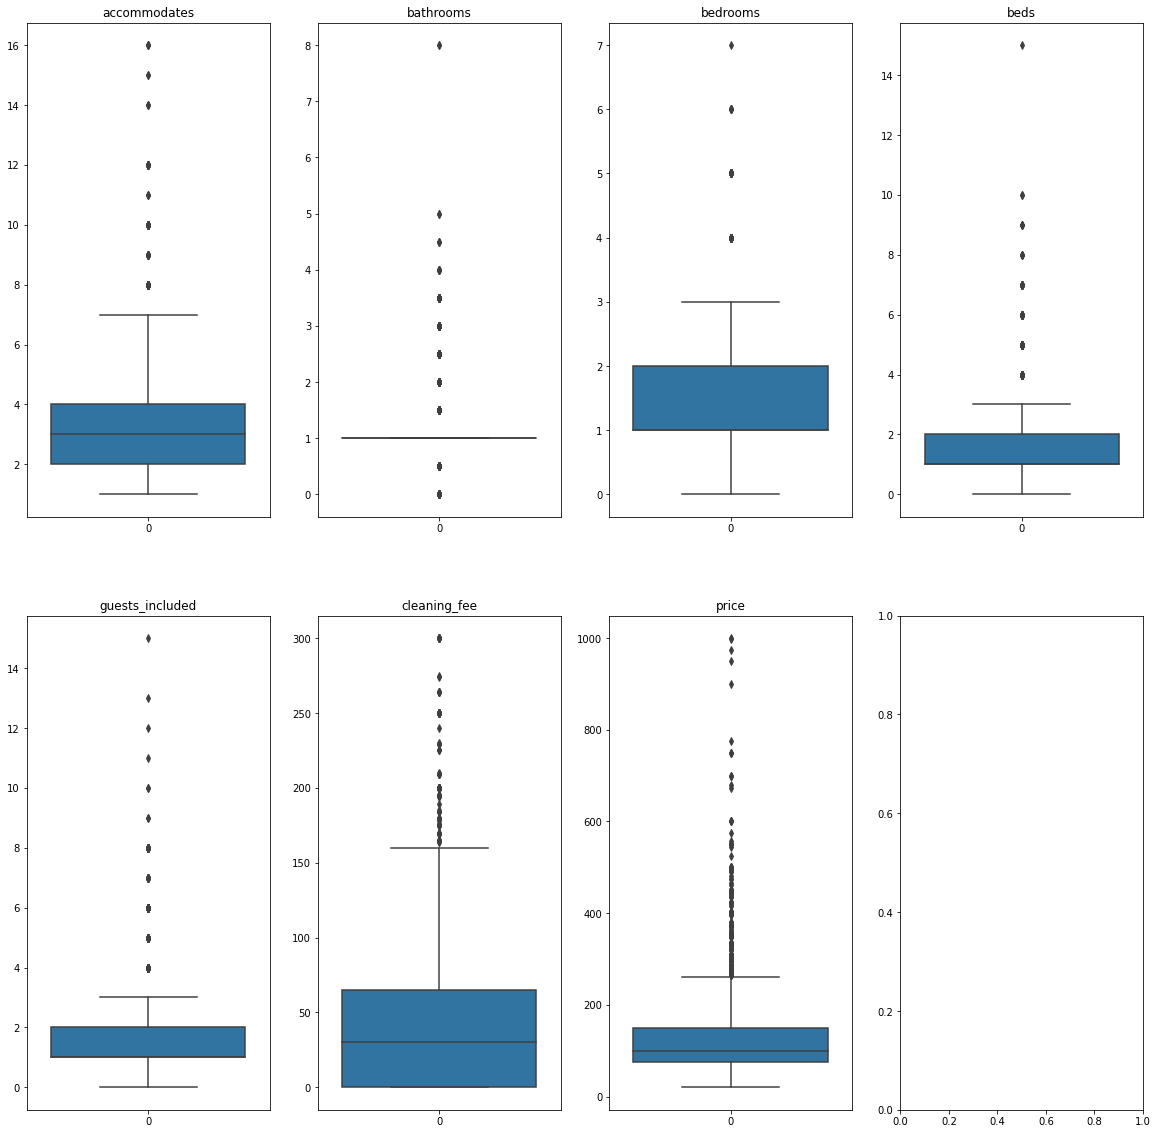

In [0]:
f,axes=plt.subplots(2,4,figsize=(20,20))
r=0
c=0
for am in numerical_columns:
    axes[r][c].set_title(am)
    sb.boxplot(data=transformed_df[am], ax=axes[r][c])
    c+=1
    if(c==4): 
        r=1 
        c=0


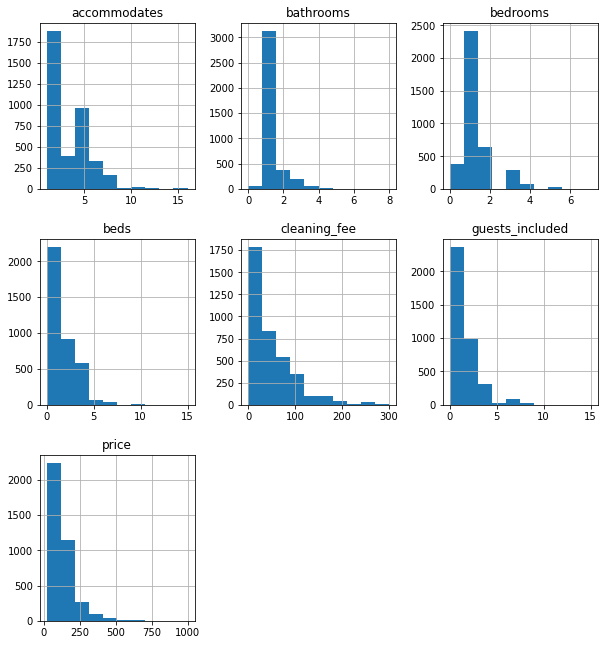

In [0]:
transformed_df[numerical_columns].hist(figsize=(10,11));


In [0]:
# Log transforming columns
#numerical_columns = [i for i in numerical_columns ] # Removing items not to be transformed
#numerical_columns=["price"]
for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64')
    transformed_df[col] = np.log(transformed_df[col]+1)
def normalize(column):
    upper=column.max()
    lower=column.min()
    y=(column-lower)/(upper-lower)
    return y
#normalize(transformed_df[numerical_columns])

Log transform makes right skewed data less skewed, and this makes pattern in the data more interpretable.

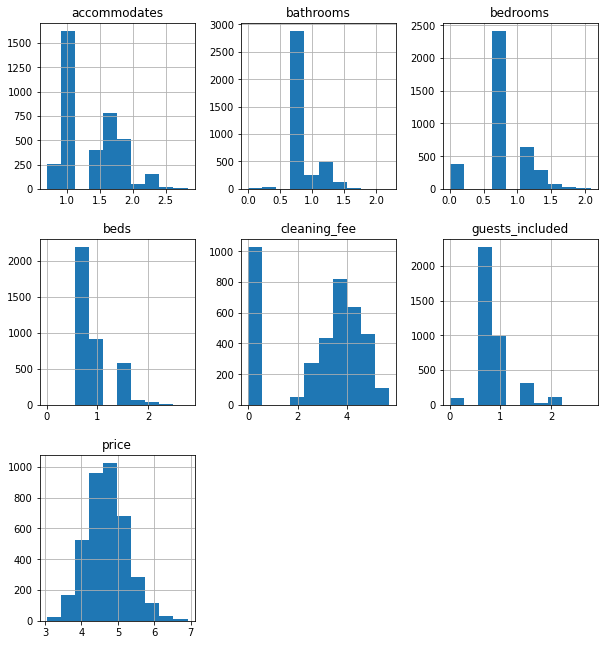

In [0]:
transformed_df[numerical_columns].hist(figsize=(10,11));
# Scaling


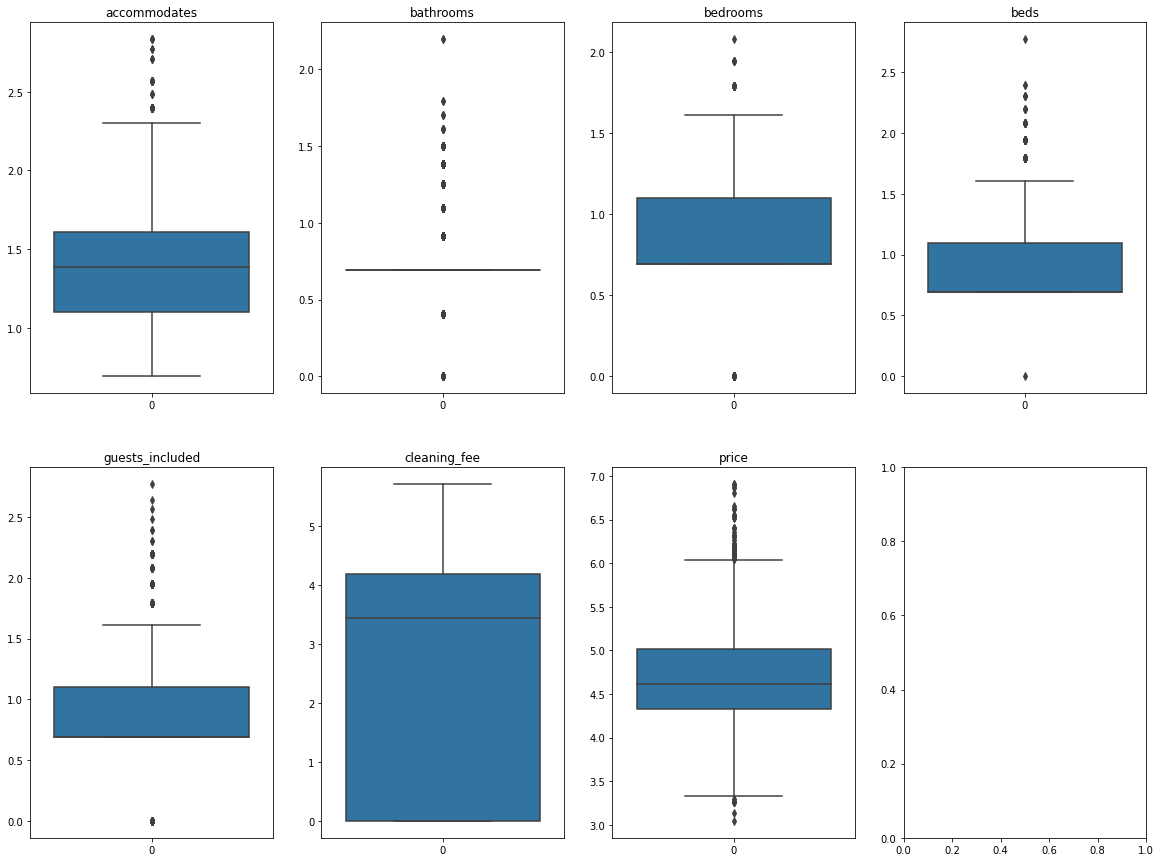

In [0]:
f,axes=plt.subplots(2,4,figsize=(20,15))
r=0
c=0
for am in numerical_columns:
    axes[r][c].set_title(am)
    sb.boxplot(data=transformed_df[am], ax=axes[r][c])
    c+=1
    if(c==4): 
        r=1 
        c=0


Now,the price is now much more normally distributed. 

## <div align = 'center'><b> Using Machine Learning to solve the problem </b></div>


###<div align='center'> <b>Problem 1 : Predicting price using Linear Regression</b></div>


#### Split into test train set

In [0]:
# Separating X and y
X = transformed_df.drop("price", axis=1)
y = transformed_df.price
#X.drop(try_drop.index,axis=1,inplace=True)
# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))
#pd.DataFrame(X, columns=list(X.columns))
# take 20 % as testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [0]:
#transformed_df.to_csv("linear_regression_data.csv")

#### **Various Machine Learning Algorithms**

We will compare 3 different classical machine learning algorithm and determine which algorithm is the best for our data. We will use 5 fold cross validation to compare the performance between each model. Ontop of that, we will try to see if a neural network model can improve the accuracy of our prediction of price.

##### **Ordinary Least Squares Linear Regression**

Intercept of Regression 	: b =  4.689882000386676
Coefficients of Regression 	: a =  [ 2.04369687e-02  1.05208491e-02  1.20965126e-01  7.30442175e-02
  1.26948873e-01  2.00198984e-02  8.92719394e-03 -7.46091521e-03
 -7.87339050e-04  1.69508357e-02  3.83409694e-03 -1.19730349e-03
 -3.56439659e+10 -2.59261333e+10 -5.32716193e+10 -2.26040927e+10
 -4.42645104e+10 -2.13249078e+10 -5.17964176e+10 -8.02941057e+09
 -1.96701113e+10 -1.87837111e+10 -2.14565813e+10 -6.07990830e+10
 -4.00002968e+10 -2.99278592e+10 -1.59890688e+10 -2.63476437e+10
 -3.36122863e+10  1.12854442e+12  1.10008783e+12  4.12262042e+11]



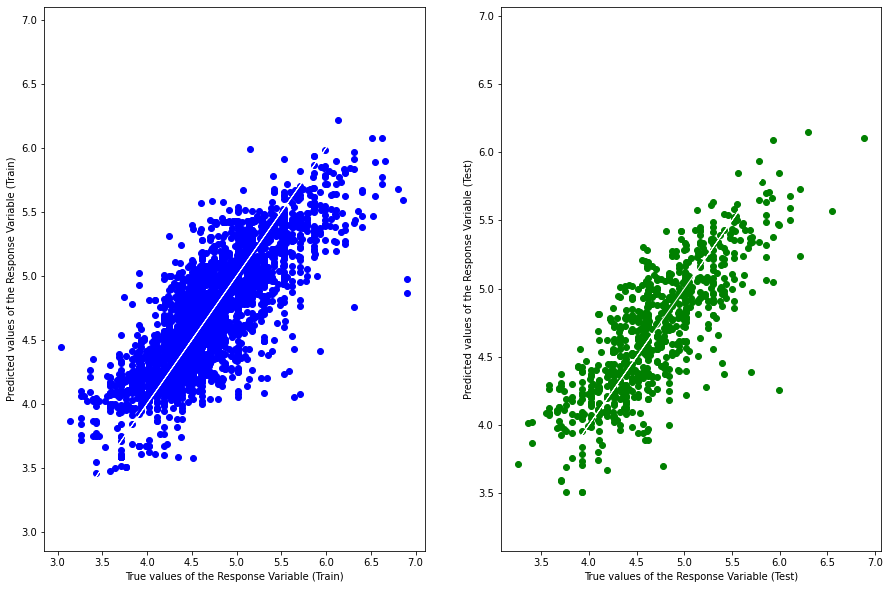

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6486085931900221
Mean Squared Error (MSE) 	: 0.11168641045350994

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6467177265810155
Mean Squared Error (MSE) 	: 0.10469463824718524

5-fold CV average score: 0.64 (std : 0.016174 )


In [0]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

kfold = KFold(n_splits=5, shuffle=True)
kf_cv_scores = cross_val_score(linreg, X,y, cv=kfold )
print("\n5-fold CV average score: %.2f (std : %2f )"  % (kf_cv_scores.mean(),kf_cv_scores.std()))



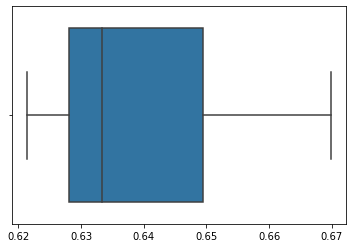

In [0]:
sb.boxplot(kf_cv_scores)

From this OLS liner regression model, we can observe tht the MSE of training and testing are quite low and there's only little difference between test and train. Based on this, we know that the model is not overfitted. and this model managed to get 5 fold cross validation average score of 0.64 which is quite impressive. We'll try to see if other algorithm can get a higher accuracy than this model

<h1 align = 'center'> Learning of something new </h1>

##### **XGBoost : XGBRegressor**
XGBoost stands for eXtreme Gradient Boosting
<br>XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data.
<br>The XGBoost library implements the gradient boosting decision tree algorithm.
<br>Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.



Training MSE: 0.0825
Validation MSE: 0.0968

Training r2: 0.7405
Validation r2: 0.6728

5-fold CV average score: 0.68 (std : 0.027331 )


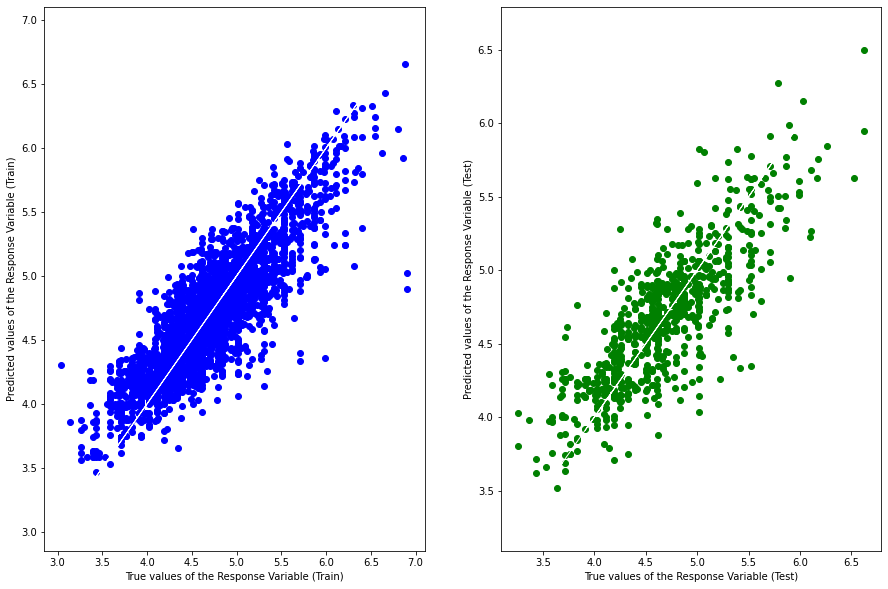

In [0]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

# Declaration and Initiation of ML Model
xgb_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
# Fit the model
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)


print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

kfold = KFold(n_splits=5, shuffle=True)
kf_cv_scores = cross_val_score(xgb_reg, X, y, cv=kfold )
print("\n5-fold CV average score: %.2f (std : %2f )"  % (kf_cv_scores.mean(),kf_cv_scores.std()))


f, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].scatter(y_train, training_preds_xgb_reg, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, val_preds_xgb_reg, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()



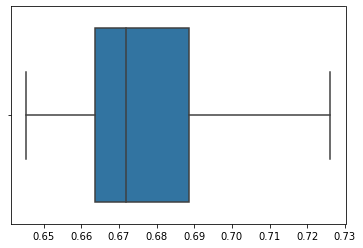

In [0]:
# Plot boxplot of the kfold scores to see how wide the spread is.
# Bigger spread = Not as good model
sb.boxplot(kf_cv_scores)

In [0]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg.head(20)

,weight
neighbourhood_group_cleansed_Interbay,0.000514
neighbourhood_group_cleansed_Ballard,0.001772
neighbourhood_group_cleansed_West Seattle,0.001996
neighbourhood_group_cleansed_Seward Park,0.002458
neighbourhood_group_cleansed_Lake City,0.003196
Pets_friendly,0.003278
neighbourhood_group_cleansed_Other neighborhoods,0.003494
guests_included,0.004216
Gym,0.004663
Family_friendly,0.004755


In [0]:
top_20=ft_weights_xgb_reg.sort_values(ascending=True,by=["weight"]).head(10).index

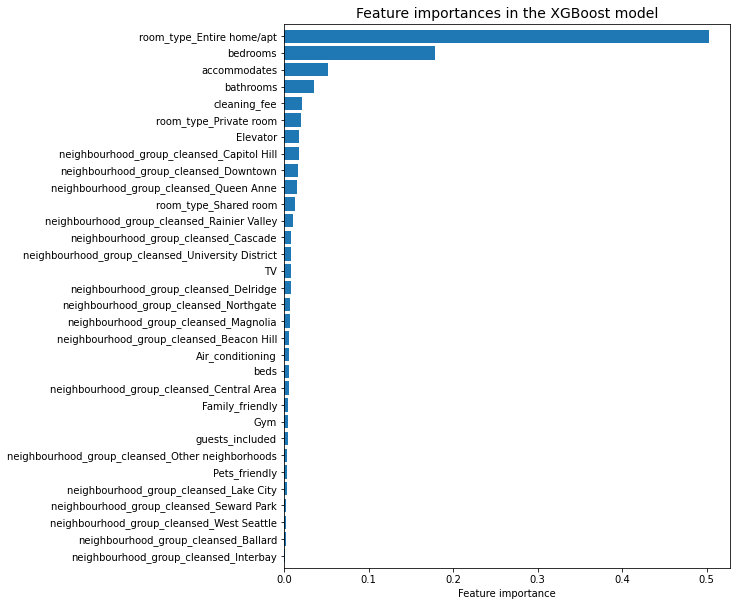

In [0]:
# Plotting feature importances
plt.figure(figsize=(8,10))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()


Based on the weight from XGBoost model

**The top 10 most important features are:**

* The number of bedrooms
* Whether the roomtype is "Entire home/apt"
* How many people the property accommodates
* The cleaning fee
* The number of bathrooms
* Downtown 
* Elevator
* Capitol Hill
* Whether the roomtype is "Entire home/apt"
* Rainier Valley


**Conclusion:** Compared to OLS linear regression, XGBoost performed better in both mse and r^2. And it has higher 10 fold cross validation score

##### **Random Forest**
A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation.

We will be using it here for regression.

We will start off by finding the depth for the tree where there's no further improvement on the validation score

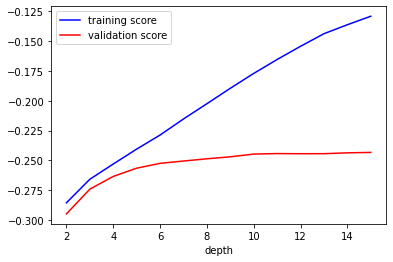

In [0]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=200)
depth = [2, 3, 4,5,6,7,8,9,10,11,12,13,14,15]#try thisvariety of parameters for model
train_score, val_score = validation_curve(
 model, X_train, y_train,
 param_name='max_depth', param_range=depth, 
scoring='neg_mean_absolute_error', cv=3)
plt.plot(depth, np.median(train_score, 1), color='blue', label='training score')
plt.plot(depth, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('depth');


We'll choose 8 as it's the best validation score that we can get.


Training MSE: 0.0819
Validation MSE: 0.1044

Training r2: 0.7423
Validation r2: 0.6469

5-fold CV average score: 0.67 (std : 0.024461 )


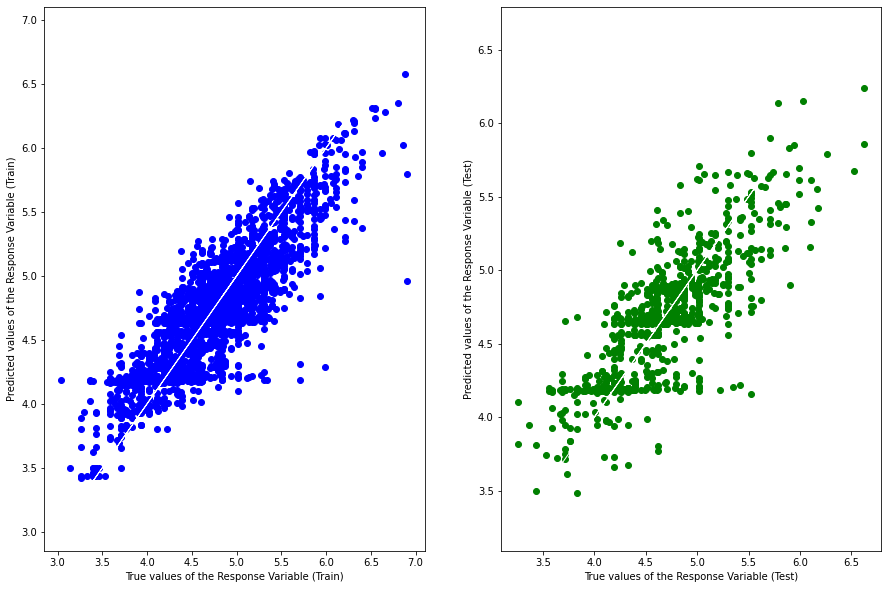

In [0]:
from sklearn.ensemble import RandomForestRegressor
# Declare and initiate the ML model
forest = RandomForestRegressor(n_estimators=200, 
                               max_depth=7,
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

kfold = KFold(n_splits=5, shuffle=True)
kf_cv_scores = cross_val_score(forest, X, y, cv=kfold )
print("\n5-fold CV average score: %.2f (std : %2f )"  % (kf_cv_scores.mean(),kf_cv_scores.std()))


f, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [0]:
!pip install rfpimp

from sklearn.metrics import r2_score
from rfpimp import permutation_importances
def r2(forest, X_train, y_train):
    return r2_score(y_train, forest.predict(X_train))

perm_imp_rfpimp = permutation_importances(forest, X_train, y_train, r2)
perm_imp_rfpimp.sort_values('Importance', inplace=True)


  Created wheel for rfpimp: filename=rfpimp-1.3.4-cp36-none-any.whl size=10086 sha256=bb8d1d4742053e216640a8aefb9213e322f5aef4e781c982bba7b0d73a25ac18
  Stored in directory: /root/.cache/pip/wheels/c7/35/67/4065afd69df4c0be693ecdec8a9c1433a23f80ee60395272ba
Successfully built rfpimp


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


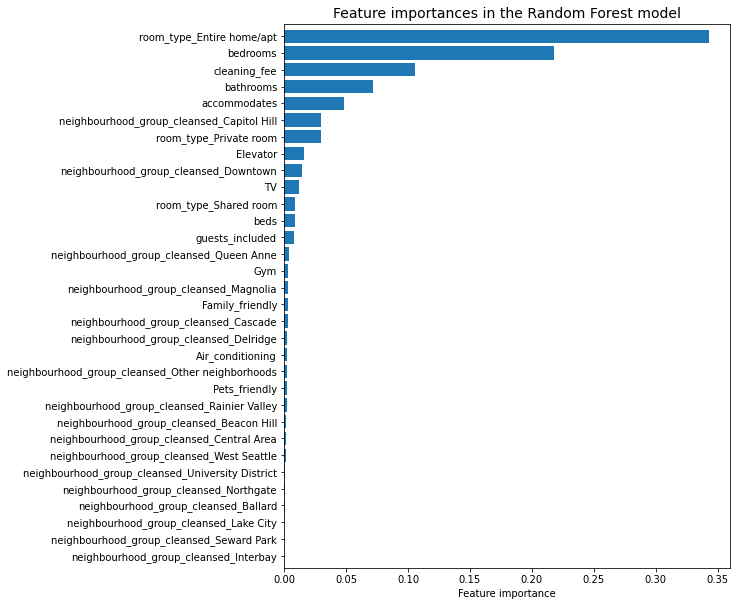

In [0]:
plt.figure(figsize=(8,10))
plt.barh(perm_imp_rfpimp.index, perm_imp_rfpimp.Importance, align='center') 
plt.title("Feature importances in the Random Forest model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [0]:
try_drop=perm_imp_rfpimp.head(11)

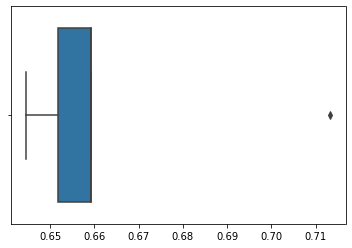

In [0]:
sb.boxplot(kf_cv_scores)

**Conclusion** Based on the experiment, too many depth will cause random forest to overfitting easily.Therefore, we have to find the right depth to prevent the model from overfitting. The score that we get is higher than ols but slightly lower than XGboost

#### **Conclusion on Classical AI Algorithms for Regression**
<br> Based on our experiment, we found out that XGboost algorithm is the best among the 3 that we have tested.It has a  cross validation average score of 0.68. 

We will take this as our benchmark and try out whether deep learning can achieve a better performance than this.


#### **Deep Learning using Tensorflow 2.0**

In [0]:
!pip install -q git+https://github.com/tensorflow/docs
import tensorflow as tf
import tensorflow_docs as tfdocs
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [0]:

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1,activation="linear")
  ])
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                optimizer="adam",
              metrics=[ 'mse'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 14,593
Trainable params: 14,593
Non-trainable params: 0
_________________________________________________________________


In [0]:
EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots(),early_stop] )


Epoch: 0, loss:4.7686,  mse:4.8086,  val_loss:0.4334,  val_mse:0.4407,  
....................................................................................................
Epoch: 100, loss:0.0346,  mse:0.0345,  val_loss:0.1643,  val_mse:0.1649,  
............................

In [0]:
loss,  mse = model.evaluate(X_test, y_test, verbose=2)


24/24 - 0s - loss: 0.1464 - mse: 0.1461


Text(0, 0.5, 'MSE ')

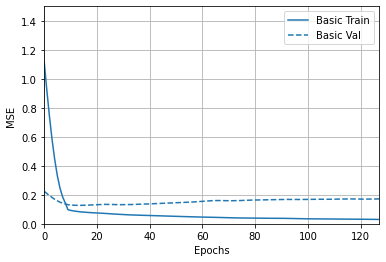

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 1.5])
plt.ylabel('MSE ')

Training MSE: 0.0545
Validation MSE: 0.1461

Training r2: 0.8286
Validation r2: 0.506


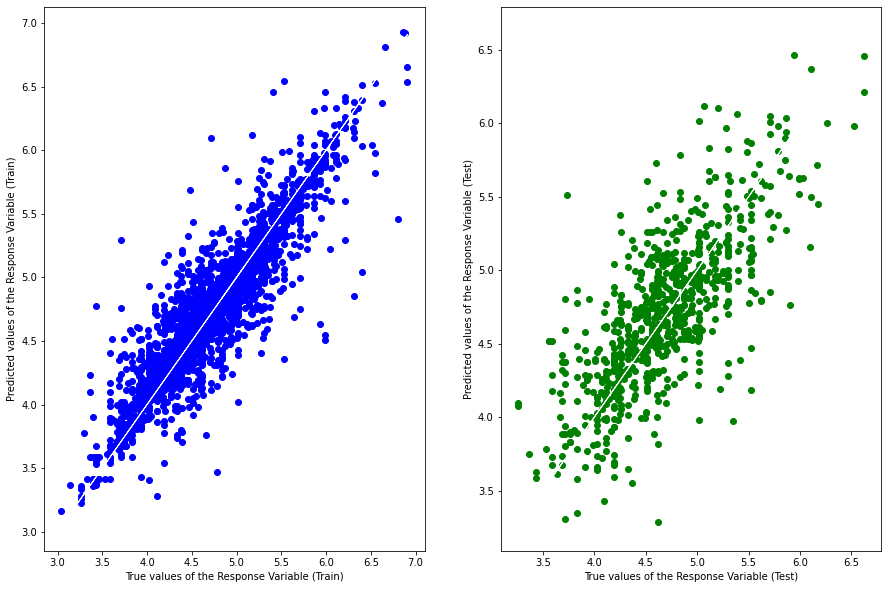

In [0]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))


f, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

 **Conclusion:** To prevent the model become overfitting, we have added earlystopping callbacks. The model is overfitted at around 100+ epoch. So we tried adding dropout layer after each dense layer. However, the performance did not improve.
 
 <br> The performance improved when we add another extra layer and  L1 regularization.Below is the model that has performance as close to the XGBoost

**2nd Model**

In [0]:

model = keras.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.005),input_shape=[len(X_train.keys())]),
    layers.Dense(128, kernel_regularizer=regularizers.l1(0.005),activation='relu'),
    layers.Dense(64, kernel_regularizer=regularizers.l1(0.005),activation='relu'),
    layers.Dense(32, kernel_regularizer=regularizers.l1(0.005),activation='relu'),
    layers.Dense(1,activation="linear")
  ])
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                optimizer="adam",
             metrics=[ 'mse'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 31,105
Trainable params: 31,105
Non-trainable params: 0
_________________________________________________________________


In [0]:
EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots(),early_stop] )


Epoch: 0, loss:14.1807,  mse:2.0930,  val_loss:11.0406,  val_mse:0.3043,  
....................................................................................................
Epoch: 100, loss:0.1652,  mse:0.1011,  val_loss:0.1795,  val_mse:0.1169,  
....................................................................................................
Epoch: 200, loss:0.1571,  mse:0.1013,  val_loss:0.1819,  val_mse:0.1257,  
....................................................................................................
Epoch: 300, loss:0.1468,  mse:0.1002,  val_loss:0.1614,  val_mse:0.1144,  
....................................................................................................
Epoch: 400, loss:0.1469,  mse:0.1015,  val_loss:0.1607,  val_mse:0.1144,  
....................................................................................................
Epoch: 500, loss:0.1446,  mse:0.1006,  val_loss:0.1597,  val_mse:0.1149,  
............................................

In [0]:
loss,  mse = model.evaluate(X_test, y_test, verbose=2)


24/24 - 0s - loss: 0.1441 - mse: 0.1013


Training MSE: 0.1
Validation MSE: 0.1013

Training r2: 0.6855
Validation r2: 0.6576


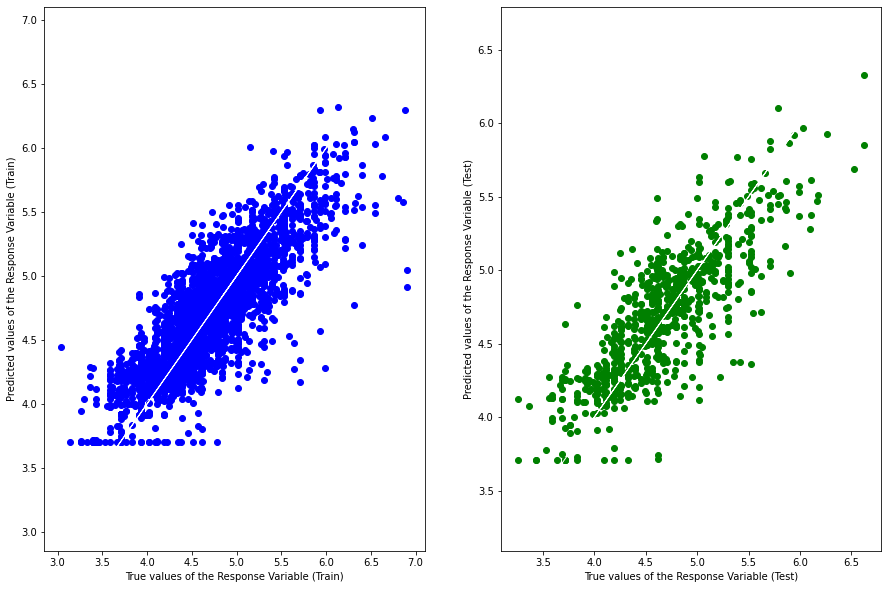

In [0]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

#kfold = KFold(n_splits=5, shuffle=True)
#kf_cv_scores = cross_val_score(model, X, y, cv=kfold )
#print("\n5 fold CV average score: %.2f" % kf_cv_scores.mean())

f, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### **Conclusion on Regression**
<br> The 2nd model remove the overfitting issue and performed as good as our machine learning model. However, in our case, Deep learning model is not necessary needed,the performance that we got for the deep learning model does not justify the computational power needed. Machine learning model can perform well enough for our case.

<br> Thus, we think that Machine learning algorithm **XGBoost** is the best algorithm for our problem

###<div align='center'><b>Problem 2 : Selling Points of Different Apartments</b></div>


#### **K-Means++ Clustering**

In [0]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Do clustering based on these variables (except id)
clustering_variables = ['id', 'price', 'cleaning_fee', \
                        'accommodates', 'bathrooms', \
                        'bedrooms', 'beds']
clustering_data = pd.DataFrame(cleaned_data[clustering_variables])
clustering_data.head()

,id,price,cleaning_fee,accommodates,bathrooms,bedrooms,beds
0,241032,85.0,0.0,4,1.0,1.0,1.0
1,953595,150.0,40.0,4,1.0,1.0,1.0
2,3308979,975.0,300.0,11,4.5,5.0,7.0
3,7421966,100.0,0.0,3,1.0,0.0,2.0
4,278830,450.0,125.0,6,2.0,3.0,3.0


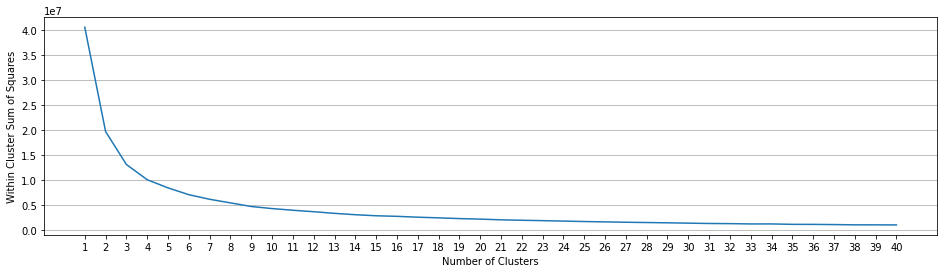

In [0]:
'''
Code obtained from M5 Clustering from Prof Sourav
'''

temp_clustering = clustering_data.iloc[:, 1:]
ids = pd.DataFrame(clustering_data.iloc[:, 0])

# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(temp_clustering)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

We will be choosing k = 4 because there is still a significant fall in WCSS and it is still able to show distinction in the clusters when the top words is shown later on.

In [0]:
# Set "optimal" Clustering Parameters
num_clust = 4
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(temp_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Features 	Price 	Fees 	Accom. 	WCs 	Rooms 	Beds

Cluster 0:	78.0	19.14	2.4	1.1	0.94	1.27	
Cluster 1:	282.07	122.94	6.3	2.06	2.68	3.33	
Cluster 2:	150.46	62.94	3.95	1.23	1.45	1.97	
Cluster 3:	568.34	155.58	7.92	2.64	3.54	4.37	

Within Cluster Sum of Squares : 10006386.632295767



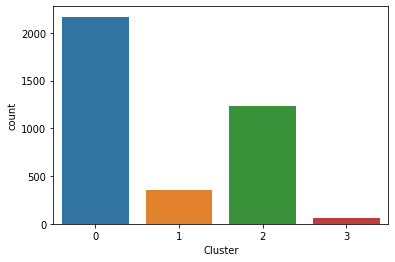

In [0]:
# Print the Cluster Centers
print("Features", "\tPrice", "\tFees", "\tAccom.", "\tWCs", "\tRooms", "\tBeds")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(temp_clustering)

# Append Labels to the Data
X_labeled = temp_clustering.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

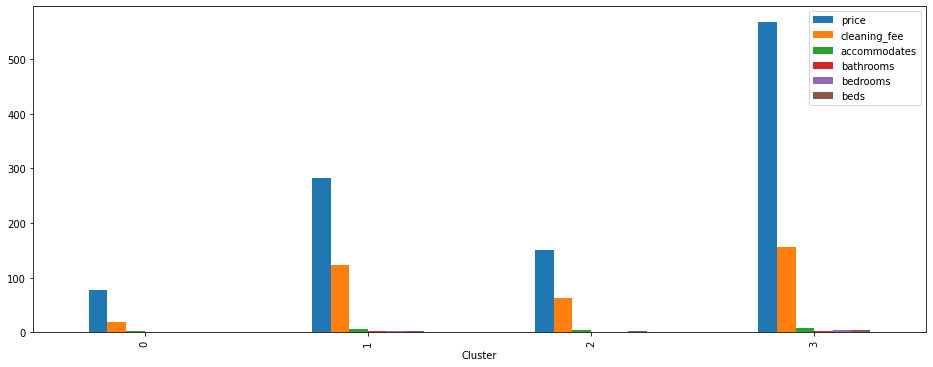

In [0]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

As we can see, together with the cluster medians above, the clusters are largely based on price as well as accomodates. This correlates with experience that Airbnb listings are mostly work-focused, family-focused or large group / party focused. This trend can be further seen from the top words describing each cluster.

In [0]:
# Append the id of each listing to obtain the reviews from reviews.csv
clustering_data = pd.concat([ids, X_labeled.reindex(index = ids.index)], axis = 1, sort = False)
clustering_data

,id,price,cleaning_fee,accommodates,bathrooms,bedrooms,beds,Cluster
0,241032,85.0,0.0,4,1.0,1.0,1.0,0
1,953595,150.0,40.0,4,1.0,1.0,1.0,2
2,3308979,975.0,300.0,11,4.5,5.0,7.0,3
3,7421966,100.0,0.0,3,1.0,0.0,2.0,0
4,278830,450.0,125.0,6,2.0,3.0,3.0,3
...,...,...,...,...,...,...,...,...
3813,8101950,359.0,230.0,6,2.0,3.0,3.0,1
3814,8902327,79.0,50.0,4,1.0,1.0,2.0,0
3815,10267360,93.0,35.0,2,1.0,1.0,1.0,0
3816,9604740,99.0,45.0,2,1.0,0.0,1.0,0


##### **Reviews by clusters**

In [0]:
# reviews_loc variable is declared and instantiated at the top. If it is not, please run that cell.
reviews_data = pd.read_csv(reviews_loc, usecols = ["listing_id", "comments"])
# To show an example, extract all reviews from cluster 1
clusternum = 1

subset = pd.DataFrame(clustering_data[clustering_data['Cluster'] == clusternum])
subset_id = subset['id']

reviews = reviews_data[reviews_data.listing_id.isin(subset_id)]
reviews

,listing_id,comments
623,6002165,The Huey House was fantastic from booking to o...
624,6002165,Amy was fantastic and so accommodating. Our fl...
1335,4251235,We didn't meet the host and all arrangements w...
1336,4251235,"All around, a very good experience, and quite ..."
1337,4251235,Listing description is accurate. The place is...
...,...,...
84307,1984962,"The House is great! Very clean, modern and all..."
84308,1984962,William was extremely communicative during the...
84309,1984962,Great location for exploring Seattle. Very cle...
84310,1984962,The house is very modern and stylish. It has e...


Some listings have >= 1 listing, some reviews have none. This takes all the reviews and puts them into a dataframe.
We will then expand on this below.

##### **Using NLP to obtain the top 20 words for each cluster**


In [0]:
# Import and download relevant libraries

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
# Pull only the listing_id and comments from the reviews.csv
# reviews_loc variable is declared and instantiated at the top. If it is not, please run that cell.
reviews_data = pd.read_csv(reviews_loc, usecols = ["listing_id", "comments"])

# Convert the comments into type string
reviews_data['comments'] = reviews_data['comments'].astype("str")
# Replace those with no comments as Null
reviews_data['comments'].fillna('Null', inplace = True)

# Import common stopwords from nltk
# Stop words are common words in the english language that often provide no extra understanding of the text
stop_words = stopwords.words('english')

# Adding in extra words into the stop_words as well as punctuations as it does not help us in our understanding of the cluster
new_stop = ['place', 'stay', 'house', 'highly', 'recommend', 'nice', 'everything', 'needed', '\'s', 'n\'t', 'great', \
            'seattle', 'us', 'host', 'would', 'time', 'apartment', 'easy', 'definitely', 'really', 'also', 'well', \
            'amazing', 'room', 'home', 'made', 'get', 'like', 'even', 'good', 'wonderful', 'could', 'amy', 'prez', 'seth']
new_stop += stop_words
new_stop += list(string.punctuation)

cluster_freq_dist = []

# For each cluster, isolate all the listings in that cluster and pull the reviews for all of them
for i in range(num_clust):
    subset = pd.DataFrame(clustering_data[clustering_data['Cluster'] == i])
    subset_id = subset['id']
    reviews = reviews_data[reviews_data.listing_id.isin(subset_id)]
    # Join all reviews in the cluster into one string
    temp_comments = " ".join(reviews['comments'])
    # Tokenize the words in temp_comments (Convert them into individual elements)
    tokens = word_tokenize(temp_comments)
    clean_tokens = []
    # Add the tokens into a list if its not in the stop_words using list comprehension
    clean_tokens = [w for w in tokens if w.lower() not in new_stop]
    # Plot the frequency distribution of the tokens into an object freq
    freq = nltk.FreqDist(clean_tokens)
    # Append the object into a list for future usage
    cluster_freq_dist.append(freq)

Number of the cluster is not consistent across iterations, but the listings inside and top words are consistent. 

<br>One cluster shows the focus on family, kitchens and mostly tourist feels.
<br>One cluster shows the focus on individual, buses and has the lowest price
<br>One cluster shows the focus on individual as well, but has higher price and more focus on walking distance
<br>One cluster shows the focus on large groups, families and area/space, with a very high price


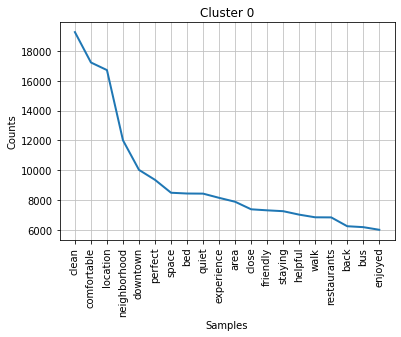

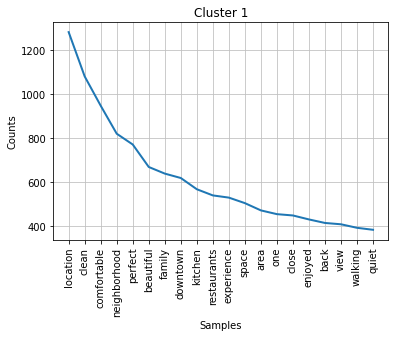

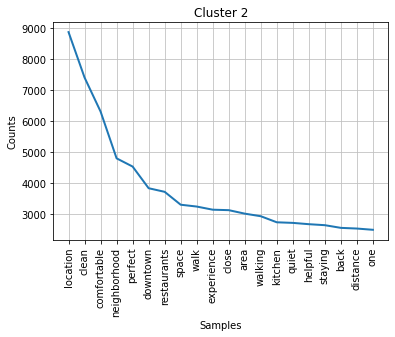

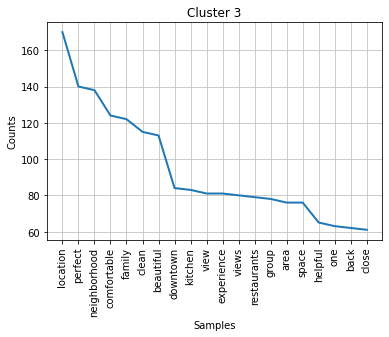

In [0]:
# Plot all the frequency distributions from the objects in the list as well as append the top_words into a list for future usage
topwords = []
for i in range(num_clust):
    cluster_freq_dist[i].plot(20, cumulative = False, title = "Cluster {}".format(i))
    top_words = [word[0] for word in cluster_freq_dist[i].most_common(20)]
    topwords.append(top_words)

##### **Dashboard**
A dashboard below to do a mock-up on the input form for the users. Actual data would probably already be collected when users are uploading their listings on to Airbnb.

In [0]:
# Importing of libraries needed to build the dashboard
from IPython.display import display
import ipywidgets as widgets
import warnings

In [0]:
# Ignore the warnings from settingwithcopywarning
warnings.filterwarnings('ignore')

temp_data = regression_data.copy()
temp_data['log_price'] = np.log(temp_data['price'])

temp_data = temp_data.append(pd.Series(), ignore_index = True)
data = temp_data.iloc[3818:]
temp_data = temp_data.iloc[:3818]

# Properties for the widget. Most likely removed.
properties = [prop for prop in cleaned_data['property_type'].unique()]
# Room types for the widget.
rooms = ['Entire home/apt', 'Private Room', 'Shared Room']
# Neighbourhood groups for the widget.
neighbourhoods = [neighbourhood for neighbourhood in cleaned_data['neighbourhood_group_cleansed'].unique()]
properties.sort()
neighbourhoods.sort()
# Variables needed for the clustering
clustering_variables = ['price', 'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds']
# Declaring a list to store the amenities widgets later
amen_list = []
# Number of amenities per row. Edit this number to edit the number of checkboxes per row
no_per_row = 3

### Tester class to hold the data from the input using the different methods
class Tester:
    def __init__(self):
        self.neighbourhood = None
        self.room = None
        self.clean_fees = None
        self.accomodates = None
        self.bedrooms = None
        self.bathrooms = None
        self.beds = None
        self.price = None
        self.guest_included = None
        self.data = data

    # Methods for the widgets to call and store the data
    def set_neighbourhood(self, Area):
        self.neighbourhood = Area
    def set_room(self, Room):
        self.room = Room
    def set_clean_fees(self, CleanFees):
        self.clean_fees = CleanFees
    def set_accoms(self, change):
        self.accomodates = change['new']
    def set_bedrooms(self, Bedrooms):
        self.bedrooms = Bedrooms
    def set_bathrooms(self, Bathrooms):
        self.bathrooms = Bathrooms
    def set_beds(self, Beds):
        self.beds = Beds
    def set_price(self, Price):
        self.price = Price
    def set_guest_included(self, Guests):
        self.guest_included = Guests
        
test = Tester()

# Do linear regression for price if there is no price given. Clustering based on the price and other variables later
def predictions(event):
    if not test.accomodates:
        output.clear_output()
        with output:
            print("Your listing must accommodate at least one person.")
        return
    if test.accomodates < 0 or test.clean_fees < 0 or test.beds < 0 or test.bedrooms < 0 or test.bathrooms < 0:
        output.clear_output()
        with output:
            print("Your listing cannot have a negative input.")
        return
    # Store the data in the test object
    ## reset the test.data dataframe to the one that is not one-hot encoded
    test.data = data
    test.data['room_type'] = test.room
    test.data['neighbourhood_group_cleansed'] = test.neighbourhood
    test.data['cleaning_fee'] = test.clean_fees
    test.data['accommodates'] = test.accomodates
    test.data['bedrooms'] = test.bedrooms
    test.data['bathrooms'] = test.bathrooms
    test.data['beds'] = test.beds
    test.data['guests_included'] = test.guest_included
    
    for var in amenities_cols:
        test.data[var] = 0
        if var in amen_list:
            test.data[var] = 1.0
    
    # One-hot encode the data
    encoded_data = temp_data.append(test.data, ignore_index = True)
    try:
        encoded_data['neighbourhood_group_cleansed'] = encoded_data['neighbourhood_group_cleansed'].astype('category')
        encoded_data['room_type'] = encoded_data['room_type'].astype('category')
        encoded_data = pd.get_dummies(encoded_data)
    except:
        print("Failed encoding!")
        return
    
    # Store the encoded data into test.data
    test.data = encoded_data.iloc[3818:]
    # Create a copy for the regression
    test.regdata = test.data.copy()
    test.regdata = test.regdata.drop(columns = ['log_price', 'price'])
    # Do regression to check price if they don't want to predict, but want to just list
    if (not test.price):
        test.data['log_price'] = xgb_reg.predict(test.regdata)
        prices.value = round(np.exp(test.data['log_price']), 2)
        test.data['price'] = test.price
    else:
        test.data['price'] = test.price
        test.data['log_price'] = np.log(test.price)
    
    
    # Create a copy of the data for clustering
    test.clustdata = pd.DataFrame(test.data[clustering_variables])
    # Do clustering to give the top 20 words
    label = kmeans.predict(test.clustdata)
    label = label[0]
    output.clear_output()
    with output:
        cluster_freq_dist[label].plot(20, cumulative = False, title = "Cluster {}".format(label))

# Change the price stored in test when the input box is changed
def on_value_change(change):
    test.price = change['new']
    
# Set all the boxes to 0 if the clear all button is pressed
def clearing(event):
    accoms_box.children[-1].value = 0
    bedrooms_box.children[0].value = 0
    bathrooms_box.children[0].value = 0
    beds_box.children[0].value = 0
    clean_fees.children[0].value = 0
    prices.value = 0
    # Checkboxes is a VBox of HBoxes which contains checkboxes
    for row in checkboxes.children:
        for checkbox in row.children:
            checkbox.value = False

# Set the price to 0 when Clear Price is pressed
def clearing_price(event):
    prices.value = 0
    
# Append or remove the respective amenity into amen_list for the predict() function to use later on
def amenities_parser(change):
    if change['new']:
        amen = change['owner'].description
        if amen not in amen_list:
            amen_list.append(amen)
    else:
        amen = change['owner'].description
        while amen in amen_list:
            amen_list.remove(amen)

# Create a generic layout which will be used multiple times
input_layout = widgets.Layout(width='160px', height='30px')
boxes_layout = widgets.Layout(display='flex', justify_content='flex-start')

# Declaring and Instantiating relevant widgets on the display or output

accoms_box = widgets.HBox([widgets.Label("Accomodates:"), widgets.FloatText(layout = input_layout)], layout = boxes_layout)
bedrooms_box = widgets.interactive(test.set_bedrooms, Bedrooms = widgets.FloatText(description = 'Bedrooms:', layout = input_layout))
bathrooms_box = widgets.interactive(test.set_bathrooms, Bathrooms = widgets.FloatText(description = 'Bathrooms:', layout = input_layout))
beds_box = widgets.interactive(test.set_beds, Beds = widgets.FloatText(description = 'Beds:', layout = input_layout))

# property_box = widgets.interactive(test.set_prop, Property=properties)
neighbourhood_box = widgets.interactive(test.set_neighbourhood, Area = neighbourhoods)
room_box = widgets.interactive(test.set_room, Room = rooms)

guest_incl = widgets.interactive(test.set_guest_included, Guests = widgets.IntText(description = 'Guests:', layout = input_layout))
clean_fees = widgets.interactive(test.set_clean_fees, CleanFees = widgets.FloatText(description = 'CleaningFee:', layout = input_layout))

fillinboxes_box = widgets.HBox([accoms_box, bedrooms_box, bathrooms_box, beds_box], layout = boxes_layout)
dropdownbox_box = widgets.HBox([neighbourhood_box, room_box], layout = boxes_layout)
additional_fees = widgets.HBox([guest_incl, clean_fees], layout = boxes_layout)

predict = widgets.Button(description = 'Predict', button_style = 'primary')
prices = widgets.BoundedFloatText(description = 'Price:', value = 0, min = 0.00, max = 9999.99, step = 1, layout = input_layout)
clear = widgets.Button(description = 'Clear All', button_style='danger')
clear_price = widgets.Button(description = 'Clear Price', button_style = 'danger')
clear_box = widgets.HBox([clear, clear_price], layout = boxes_layout)

info_label = widgets.Label('If the price is set to 0, we will predict the price for you given the values you have put in.')
predict_box = widgets.HBox([predict, prices], layout = boxes_layout)

amenities = {}
check_list = []
list_list = []
add = 0

# Store the checkbox object in a dictionary with the amenity name as a key for later-on access
for var in amenities_cols:
    amenities[var] = widgets.Checkbox(value=False, description=var, disabled=False)
    check_list.append(amenities[var])

# To lay out the checkboxes with the max number per row indicated in no_per_row at the top
l = len(check_list)
if l % no_per_row: add = 1
for i in range(l // no_per_row + add):
    list_list.append(widgets.HBox(check_list[i * no_per_row : i * no_per_row + no_per_row], layout = boxes_layout))
checkboxes = widgets.VBox(list_list)
    
# Set the what widget to call which function upon click of the widget
clear.on_click(clearing)
clear_price.on_click(clearing_price)
predict.on_click(predictions)

# Set the widget to call the function upon change in the input of the widget
prices.observe(on_value_change, names = 'value')
accoms_box.children[-1].observe(test.set_accoms, names = 'value')
for row in checkboxes.children:
    for checkbox in row.children:
        checkbox.observe(amenities_parser, names = 'value')

# Create an output so I can clear it when finding a new house value
output = widgets.Output(layout={'border': '1px solid black'})

display(dropdownbox_box, fillinboxes_box, additional_fees, checkboxes, predict_box, clear_box, info_label, output)

Label(value='If the price is set to 0, we will predict the price for you given the values you have put in.')

Output(layout=Layout(border='1px solid black'))

In [0]:
cleaned_data

,id,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,Laundry,TV,Parking,Family_friendly,Pets_friendly,Elevator,Security,Air_conditioning,24-Hour_Check-in,Gym
0,241032,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,85.0,595,2635,0.0,0.0,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,953595,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,150.0,"$1,000.00","$3,000.00",100.0,40.0,1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3308979,Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,975.0,6825,30225,1000.0,300.0,10,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,7421966,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,100.0,$650.00,"$2,300.00",0.0,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,278830,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,450.0,3150,13950,700.0,125.0,6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,Other neighborhoods,House,Entire home/apt,6,2.0,3.0,3.0,359.0,2513,11129,0.0,230.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3814,8902327,Capitol Hill,Apartment,Entire home/apt,4,1.0,1.0,2.0,79.0,553,2449,500.0,50.0,3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3815,10267360,Rainier Valley,House,Entire home/apt,2,1.0,1.0,1.0,93.0,$450.00,2883,250.0,35.0,2,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3816,9604740,Capitol Hill,Other,Entire home/apt,2,1.0,0.0,1.0,99.0,693,3069,300.0,45.0,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### **Conclusion on Clustering**
There are distinct patterns across clusters when we consider the price points, number of beds and top words you see in reviews of those listings.

## **Overall Conclusion**

XGBoost is the model of choice when predicting and estimating the price for the listing.

<br> There are distinct differences in the cluster when we consider the words people use to describe the house in their reviews.

<br> Moving forward, we can consider using sentiment analysis to identify the top 10 positive words, and top 10 negative words to aid the Airbnb hosts further.

<br> However, we should not forget the humane aspect of such listings and reviews as well as the ability for an outlier to outperform the current status quo and become the new status quo.

# References


https://www.kaggle.com/airbnb/seattle
<br>https://towardsdatascience.com/predicting-airbnb-prices-with-machine-learning-and-deep-learning-f46d44afb8a6
<br >https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/
<br> https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb
<br> https://medium.com/@lily_su/adjusting-parameters-for-scikitlearn-use-case-of-predicting-daily-total-number-of-bicycle-trips-c6cfdec02993
<br> Prof Sourav's notes M5 Clustering on how to use KMeans Clustering
<br> https://ipywidgets.readthedocs.io/en/stable/